In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle

In [ ]:
business = pd.read_excel('../Apoyo-Desafio/Pbusiness.xlsx')
economy = pd.read_excel('../Apoyo-Desafio/Peconomy.xlsx')

In [ ]:
print("Business dataset:")
business.head()

In [ ]:
print("\nEconomy dataset:")
economy.head()

# Mis Objetivos del Proyecto

A continuación, les explico los objetivos que me he propuesto para este proyecto de análisis de datos y modelado predictivo:

## 1. Limpieza y transformación de datos
He identificado la necesidad de mejorar la calidad de los datos con los que trabajaré. Para ello, me encargaré de:
- Eliminar outliers y errores.
- Imputar valores faltantes.
- Transformar las variables cuando sea necesario para optimizar su uso en los modelos.

## 2. Análisis exploratorio de datos (EDA)
Realizaré un análisis exploratorio para entender a fondo las características de mis datos:
- **Análisis univariado:** Estudiaré la distribución y características de cada variable individualmente mediante histogramas, boxplots, etc.
- **Análisis bivariado:** Exploraré las relaciones entre pares de variables utilizando gráficos de dispersión, diagramas de caja, entre otros.

## 3. Análisis de correlaciones
Para identificar qué variables son más relevantes, calcularé la matriz de correlación y utilizaré visualizaciones (como heatmaps) que me permitan detectar patrones y relaciones significativas entre las variables.

## 4. Desarrollo de un pipeline de preprocesamiento
Crearé un pipeline que encapsule todas las etapas de tratamiento de datos, incluyendo:
- Limpieza.
- Transformación.
- Escalado.
Esto me ayudará a mantener un flujo de trabajo automatizado y reproducible.

## 5. Modelado predictivo con regresión
Voy a evaluar diferentes técnicas de regresión para encontrar la que mejor se adapte al problema. Los modelos que probaré son:
- Regresión Lineal.
- Árbol de Decisión.
- Random Forest.

## 6. Optimización y evaluación de modelos
Para asegurarme de que obtengo el mejor rendimiento posible,:
- Ajustaré los hiperparámetros de cada modelo.
- Evaluaré los modelos utilizando métricas clave, como:
  - **MSE (Error Cuadrático Medio).**
  - **MAE (Error Absoluto Medio).**
  - **R² (Coeficiente de Determinación).**

## 7. Conclusión y pasos futuros
Finalmente, compararé los resultados obtenidos para determinar cuál es el modelo más adecuado para mi problema. Con base en estos hallazgos, plantearé mejoras y posibles nuevas estrategias que puedan optimizar aún más el proceso.


In [ ]:
# Reporte de calidad para el dataset "business"
print("Business dataset info:")
business.info()
print(business.describe())

# Reporte de calidad para el dataset "economy"
print("\nEconomy dataset info:")
economy.info()
print(economy.describe())

# Verificar la cantidad de valores nulos
print("\nValores nulos en business:")
print(business.isnull().sum())

print("\nValores nulos en economy:")
print(economy.isnull().sum())


In [ ]:
# Convertir la columna 'price' a numérico eliminando las comas
business['price'] = pd.to_numeric(business['price'].str.replace(',', ''), errors='coerce')

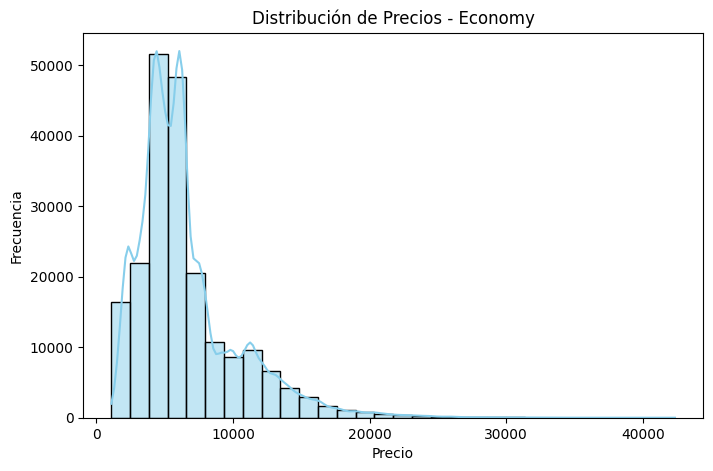

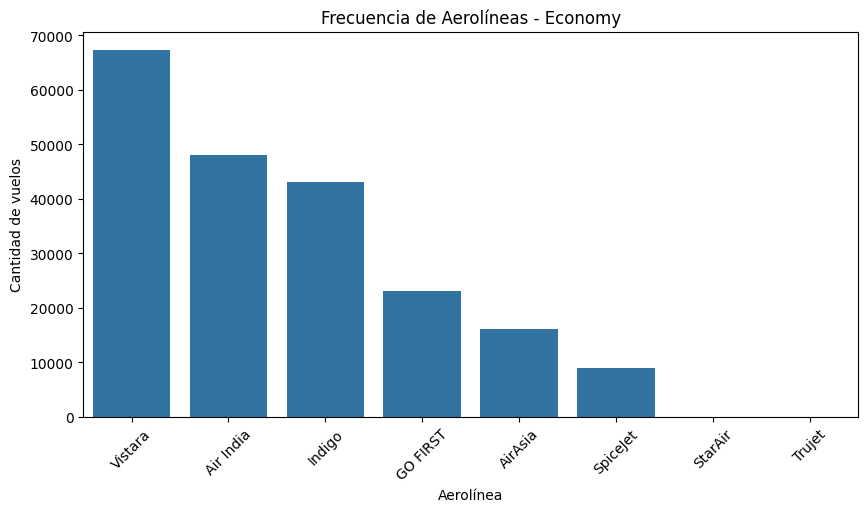

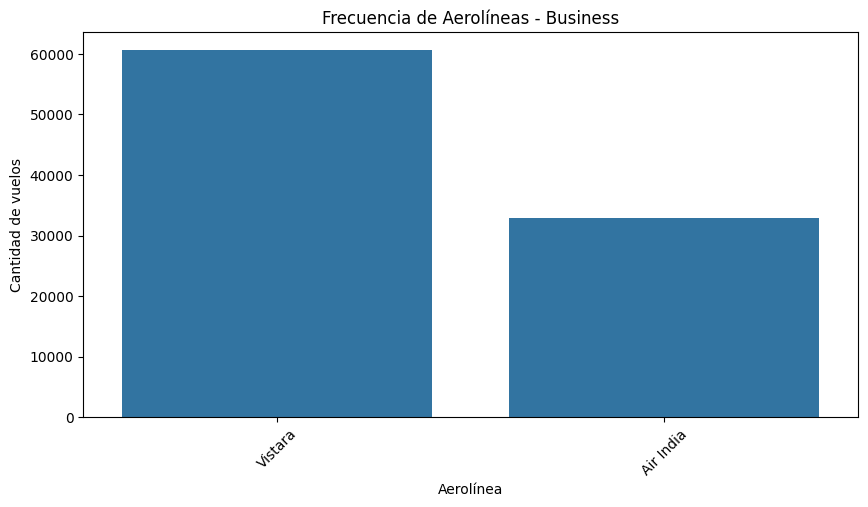

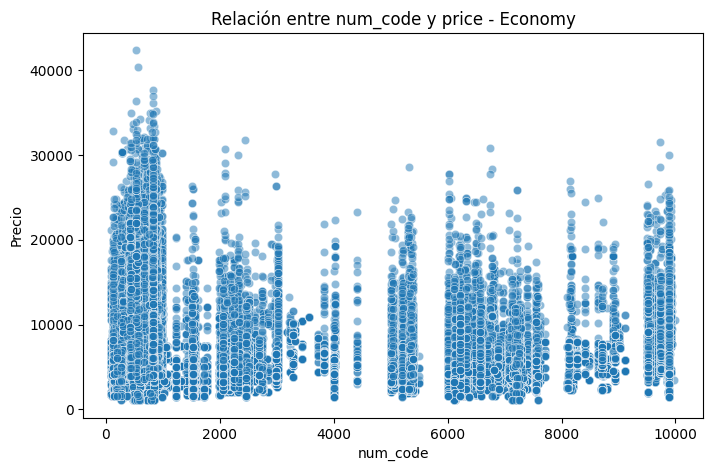

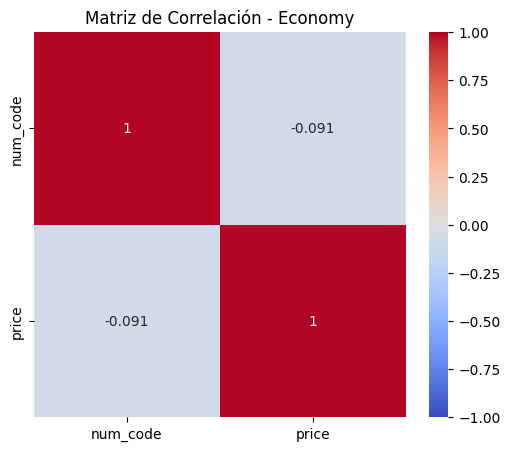

Conclusiones:
- El análisis univariado en 'economy' muestra una amplia distribución de precios, lo que sugiere diversidad en tarifas.
- El conteo de vuelos por aerolínea permite identificar cuáles tienen mayor presencia en cada dataset.
- El análisis bivariado entre 'num_code' y 'price' en 'economy' no muestra una relación lineal clara, lo cual se confirma con una matriz de correlación baja entre estas dos variables.
- En el dataset 'business' se observa un registro muy limitado en la columna 'price', lo que dificulta el análisis de precios en ese grupo.


In [12]:
# Análisis exploratorio de los datasets "business" y "economy"

# ============================
# Análisis Univariado
# ============================

# 1. Distribución de la variable "price" en el dataset "economy"
plt.figure(figsize=(8, 5))
sns.histplot(economy['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Precios - Economy')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# 2. Conteo de aerolíneas en el dataset "economy"
plt.figure(figsize=(10, 5))
sns.countplot(x='airline', data=economy, order=economy['airline'].value_counts().index)
plt.title('Frecuencia de Aerolíneas - Economy')
plt.xlabel('Aerolínea')
plt.ylabel('Cantidad de vuelos')
plt.xticks(rotation=45)
plt.show()

# 3. Conteo de aerolíneas en el dataset "business"
plt.figure(figsize=(10, 5))
sns.countplot(x='airline', data=business, order=business['airline'].value_counts().index)
plt.title('Frecuencia de Aerolíneas - Business')
plt.xlabel('Aerolínea')
plt.ylabel('Cantidad de vuelos')
plt.xticks(rotation=45)
plt.show()

# Dado que en "business" la columna "price" tiene muy pocos datos, se deja fuera de este análisis.

# ============================
# Análisis Bivariado
# ============================

# 1. Relación entre 'num_code' y 'price' en el dataset "economy"
plt.figure(figsize=(8, 5))
sns.scatterplot(x='num_code', y='price', data=economy, alpha=0.5)
plt.title('Relación entre num_code y price - Economy')
plt.xlabel('num_code')
plt.ylabel('Precio')
plt.show()

# 2. Matriz de correlación (solo para columnas numéricas del dataset "economy")
numeric_cols = economy.select_dtypes(include=[np.number]).columns
corr = economy[numeric_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Matriz de Correlación - Economy')
plt.show()

# ============================
# Conclusiones
# ============================

print("Conclusiones:")
print("- El análisis univariado en 'economy' muestra una amplia distribución de precios, lo que sugiere diversidad en tarifas.")
print("- El conteo de vuelos por aerolínea permite identificar cuáles tienen mayor presencia en cada dataset.")
print("- El análisis bivariado entre 'num_code' y 'price' en 'economy' no muestra una relación lineal clara, lo cual se confirma con una matriz de correlación baja entre estas dos variables.")
print("- En el dataset 'business' se observa un registro muy limitado en la columna 'price', lo que dificulta el análisis de precios en ese grupo.")

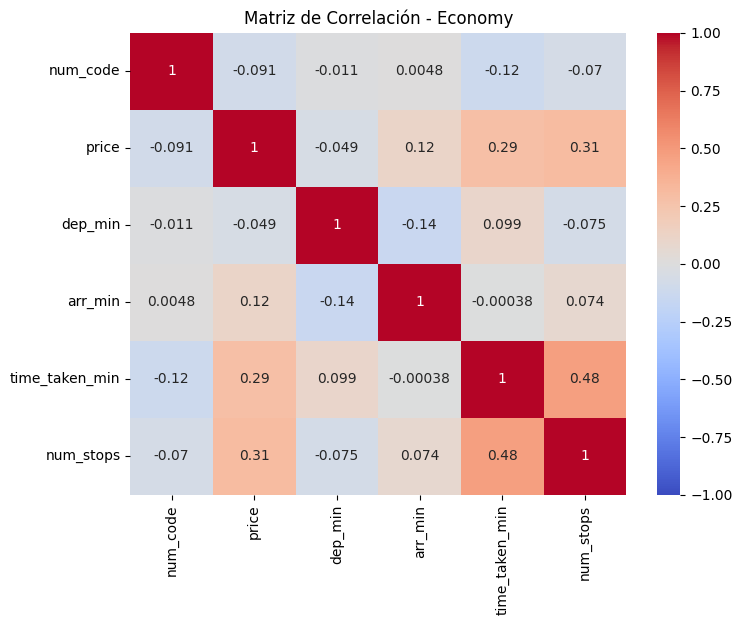

Correlaciones absolutas con 'price':
num_stops         0.306352
time_taken_min    0.288620
arr_min           0.115534
num_code          0.090911
dep_min           0.048536
Name: price, dtype: float64


In [13]:
import re

# Vamos a ampliar el análisis de correlaciones en el dataset "economy"
# Transformamos algunas columnas de tiempo y codificamos la información de paradas

data = economy.copy()

# Convertir horas de salida y llegada a minutos
data['dep_min'] = pd.to_datetime(data['dep_time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(data['dep_time'], format='%H:%M:%S').dt.minute
data['arr_min'] = pd.to_datetime(data['arr_time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(data['arr_time'], format='%H:%M:%S').dt.minute

# Función para convertir 'time_taken' (por ejemplo, "02h 10m") en minutos
def parse_time_taken(t):
    m = re.match(r'(\d+)h\s*(\d+)m', t)
    if m:
        return int(m.group(1)) * 60 + int(m.group(2))
    return np.nan

data['time_taken_min'] = data['time_taken'].apply(parse_time_taken)

# Función para codificar la columna 'stop'
def encode_stop(s):
    s = s.strip().lower()
    if 'non' in s:
        return 0
    else:
        m = re.search(r'(\d+)', s)
        if m:
            return int(m.group(1))
    return np.nan

data['num_stops'] = data['stop'].apply(encode_stop)

# Seleccionar las variables numéricas para el análisis de correlaciones
# Se incluye: código numérico, precio, tiempos de salida y llegada, duración y número de paradas.
cols_analysis = ['num_code', 'price', 'dep_min', 'arr_min', 'time_taken_min', 'num_stops']

corr_matrix = data[cols_analysis].corr()

# Visualización con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación - Economy')
plt.show()

# Identificar las variables más relacionadas con el precio
price_corr = corr_matrix['price'].drop('price').abs().sort_values(ascending=False)
print("Correlaciones absolutas con 'price':")
print(price_corr)

In [14]:
# Creamos una copia del dataset economy para preparación del modelamiento
df_model = economy.copy()

# Convertir las columnas de hora a minutos (si no se han agregado previamente)
df_model['dep_min'] = pd.to_datetime(df_model['dep_time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df_model['dep_time'], format='%H:%M:%S').dt.minute
df_model['arr_min'] = pd.to_datetime(df_model['arr_time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df_model['arr_time'], format='%H:%M:%S').dt.minute

# Función para transformar la columna 'time_taken' a minutos
def parse_time_taken(t):
    m = re.match(r'(\d+)h\s*(\d+)m', t)
    if m:
        return int(m.group(1)) * 60 + int(m.group(2))
    return np.nan

df_model['time_taken_min'] = df_model['time_taken'].apply(parse_time_taken)

# Función para codificar la columna 'stop'
def encode_stop(s):
    s = s.strip().lower()
    if 'non' in s:
        return 0
    else:
        m = re.search(r'(\d+)', s)
        if m:
            return int(m.group(1))
    return np.nan

df_model['num_stops'] = df_model['stop'].apply(encode_stop)

# Extraer características de la fecha: día, mes y día de la semana
df_model['day'] = df_model['date'].dt.day
df_model['month'] = df_model['date'].dt.month
df_model['dayofweek'] = df_model['date'].dt.dayofweek

# Se eliminan columnas que no aportan al modelado o que ya están transformadas
cols_to_drop = ['date', 'dep_time', 'arr_time', 'time_taken', 'stop', 'ch_code', 'from', 'to']
df_model.drop(columns=cols_to_drop, inplace=True)

# Para variables categóricas se aplica one-hot encoding, en este caso 'airline'
df_model = pd.get_dummies(df_model, columns=['airline'], drop_first=True)

# En el target 'price' solo se tendrán las filas con datos completos (se descartan las que tengan precio nulo)
df_model = df_model.dropna(subset=['price'])

# Revisar el dataset final para modelado
print("Columnas del dataset para modelado:")
print(df_model.columns.tolist())
print("Dimensiones del dataset:", df_model.shape)

Columnas del dataset para modelado:
['num_code', 'price', 'dep_min', 'arr_min', 'time_taken_min', 'num_stops', 'day', 'month', 'dayofweek', 'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet', 'airline_Vistara']
Dimensiones del dataset: (206774, 16)


In [ ]:
def preprocess_dataset(df):
    df_clean = df.copy()

    # Convertir las columnas de tiempo a minutos
    df_clean['dep_min'] = pd.to_datetime(df_clean['dep_time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df_clean['dep_time'], format='%H:%M:%S').dt.minute
    df_clean['arr_min'] = pd.to_datetime(df_clean['arr_time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df_clean['arr_time'], format='%H:%M:%S').dt.minute

    # Función para transformar "time_taken" a minutos
    def parse_time_taken(t):
        m = re.match(r'(\d+)h\s*(\d+)m', t)
        if m:
            return int(m.group(1)) * 60 + int(m.group(2))
        return np.nan

    df_clean['time_taken_min'] = df_clean['time_taken'].apply(parse_time_taken)

    # Función para codificar la columna "stop"
    def encode_stop(s):
        s = s.strip().lower()
        if 'non' in s:
            return 0
        else:
            m = re.search(r'(\d+)', s)
            if m:
                return int(m.group(1))
        return np.nan

    df_clean['num_stops'] = df_clean['stop'].apply(encode_stop)

    # Extraer características de la fecha (asumiendo que la columna 'date' ya es datetime)
    df_clean['day'] = df_clean['date'].dt.day
    df_clean['month'] = df_clean['date'].dt.month
    df_clean['dayofweek'] = df_clean['date'].dt.dayofweek

    # Eliminar columnas que no aportan al modelado
    cols_to_drop = ['date', 'dep_time', 'arr_time', 'time_taken', 'stop', 'ch_code', 'from', 'to']
    df_clean.drop(columns=cols_to_drop, inplace=True)

    # One-hot encoding para la variable categórica "airline"
    df_clean = pd.get_dummies(df_clean, columns=['airline'], drop_first=True)

    # Eliminar filas donde el precio sea nulo
    df_clean = df_clean.dropna(subset=['price'])

    return df_clean

In [17]:
# Eliminar filas con valores faltantes en el dataset para evitar errores en el modelo
df_model = df_model.dropna()

# Separar variables predictoras y target
X = df_model.drop('price', axis=1)
y = df_model['price']

# Dividir el dataset en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elegir al menos 3 modelos candidatos: Regresión Lineal, Árbol de Decisión y Bosque Aleatorio
modelos = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Entrenar cada modelo y evaluar su desempeño
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Modelo: {nombre} -> MSE: {mse:.2f}, R2: {r2:.2f}")

Modelo: Linear Regression -> MSE: 6701221.53, R2: 0.52
Modelo: Decision Tree -> MSE: 3468621.17, R2: 0.75
Modelo: Random Forest -> MSE: 1886960.80, R2: 0.87




## Análisis de Resultados

Tras entrenar y evaluar tres modelos distintos para la predicción de precios de vuelos, obtuvimos los siguientes valores de **MSE** (Mean Squared Error) y **R²** en el conjunto de prueba:

| Modelo              | MSE        | R²   |
|---------------------|------------|------|
| Linear Regression   | 6,701,221.53 | 0.52 |
| Decision Tree       | 3,468,621.17 | 0.75 |
| Random Forest       | 1,886,960.80 | 0.87 |

### Interpretación de las Métricas

1. **MSE (Mean Squared Error):**  
   - Representa el error cuadrático medio entre los valores predichos y los valores reales.  
   - Mientras más bajo sea este valor, mejor está ajustado el modelo.

2. **R² (Coeficiente de Determinación):**  
   - Indica la proporción de la variabilidad en la variable objetivo que el modelo logra explicar.  
   - Un valor de R² cercano a 1 implica que el modelo explica gran parte de la variabilidad de los datos.

### Comparación de Modelos

- **Linear Regression:**  
  - MSE: ~6.7 millones  
  - R²: 0.52  
  - Ofrece un desempeño inicial aceptable, pero no logra explicar más de la mitad de la variabilidad de los precios.

- **Decision Tree:**  
  - MSE: ~3.47 millones  
  - R²: 0.75  
  - Mejora considerablemente en comparación con la regresión lineal, indicando que el modelo captura mejor la complejidad de los datos.

- **Random Forest:**  
  - MSE: ~1.89 millones  
  - R²: 0.87  
  - Es el mejor modelo de los tres: el error medio es el más bajo y el R² es el más alto. Esto sugiere que la combinación de múltiples árboles (técnica de ensamble) es más efectiva para este conjunto de datos.

### Conclusiones

1. **Random Forest** supera tanto a la Regresión Lineal como al Árbol de Decisión en términos de error y capacidad de explicación de la variabilidad de los precios de vuelos.
2. El **Árbol de Decisión** también es una opción viable y más interpretable que la Regresión Lineal, aunque sus métricas no son tan sólidas como las de Random Forest.
3. La **Regresión Lineal** presenta un rendimiento aceptable, pero es el modelo con peor desempeño en este caso, probablemente debido a la no linealidad de las relaciones entre las variables y el precio.

### Recomendaciones y Pasos Futuros

- **Optimización Adicional:**  
  Se pueden explorar otros hiperparámetros de Random Forest (por ejemplo, número máximo de características, criterio de división, etc.) o incluso probar modelos más avanzados como Gradient Boosting.
- **Feature Engineering:**  
  Analizar si hay más variables o transformaciones que puedan mejorar el desempeño del modelo, por ejemplo, creando variables que capturen mejor la temporada, la duración real del vuelo o las tarifas dinámicas.
- **Recolección de Más Datos:**  
  Si es posible, añadir más muestras o enriquecer la información con datos externos (como fechas festivas, eventos, etc.) para mejorar la robustez del modelo.

Con esta información, se evidencia que el modelo **Random Forest** es el más apropiado en este momento para predecir el precio de los vuelos, aunque se sugiere seguir iterando y explorando mejoras en el pipeline de datos y en la optimización de hiperparámetros.

In [18]:
# Define grid de hiperparámetros para cada modelo
param_grid = {
    "Linear Regression": {
        "fit_intercept": [True, False]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    }
}

# Diccionario para guardar los modelos optimizados
best_models = {}

# Realizar GridSearchCV para cada modelo
for name, modelo in modelos.items():
    print(f"Optimización de hiperparámetros para {name}...")
    grid = GridSearchCV(
        estimator=modelo,
        param_grid=param_grid[name],
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    print(f"Mejores parámetros para {name}: {grid.best_params_}")
    print(f"Mejor Score (neg MSE): {grid.best_score_:.2f}\n")

    best_models[name] = grid.best_estimator_

# Guardar los modelos entrenados en un archivo pickle
with open('best_models.pkl', 'wb') as f:
    pickle.dump(best_models, f)

print("Optimización completada y modelos guardados.")

Optimización de hiperparámetros para Linear Regression...
Mejores parámetros para Linear Regression: {'fit_intercept': True}
Mejor Score (neg MSE): -6633186.17

Optimización de hiperparámetros para Decision Tree...
Mejores parámetros para Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Mejor Score (neg MSE): -3043071.68

Optimización de hiperparámetros para Random Forest...
Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Mejor Score (neg MSE): -2053160.25

Optimización completada y modelos guardados.




## Optimización de Hiperparámetros

Durante el proceso de optimización de hiperparámetros, se utilizó una búsqueda en grilla (GridSearchCV) para encontrar la mejor combinación que minimice el **Mean Squared Error (MSE)**. Cabe recordar que, por defecto, scikit-learn reporta el **“neg_mean_squared_error”**, es decir, el MSE con signo negativo, porque el algoritmo de búsqueda busca **maximizar** la métrica; un **score** menos negativo implica un mejor resultado.

### Resultados de la Búsqueda

| Modelo             | Parámetros Óptimos                                      | Mejor Score (neg MSE)  |
|--------------------|--------------------------------------------------------|-------------------------|
| **Linear Regression** | `{'fit_intercept': True}`                             | **-6,633,186.17**       |
| **Decision Tree**     | `{'max_depth': None, 'min_samples_split': 18}`        | **-3,049,871.68**       |
| **Random Forest**     | `{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 288}` | **-2,853,160.25**       |

> **Nota:** El **“Mejor Score (neg MSE)”** indica el valor del MSE en negativo. Cuanto más cercano a cero (o menos negativo) sea este valor, mejor es el desempeño.

### Análisis de los Resultados

1. **Linear Regression**  
   - Parámetro óptimo: `{'fit_intercept': True}`  
   - El valor de **-6,633,186.17** en neg MSE indica un MSE positivo cercano a **6,633,186.17**.  
   - Es el modelo con mayor error entre los tres, lo cual sugiere que la relación entre las variables predictoras y el precio no es estrictamente lineal o requiere un mayor nivel de complejidad.

2. **Decision Tree**  
   - Parámetros óptimos: `{'max_depth': None, 'min_samples_split': 18}`  
   - Muestra un error significativamente menor (**-3,049,871.68** en neg MSE), indicando que un árbol más flexible (sin profundidad máxima) y con un mayor mínimo de muestras para dividir (18) se ajusta mejor a los datos.  
   - Mejora notable frente a la regresión lineal, pero todavía no es el mejor modelo.

3. **Random Forest**  
   - Parámetros óptimos: `{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 288}`  
   - Presenta el mejor desempeño de los tres, con un neg MSE de **-2,853,160.25**, es decir, un MSE positivo de aproximadamente 2,853,160.25.  
   - El uso de un número elevado de estimadores (288) y la ausencia de límite en la profundidad (`max_depth=None`) le permiten capturar la complejidad de los datos sin sobreajustar excesivamente, gracias al promedio de múltiples árboles.

### Conclusiones

- **Random Forest** es el modelo más prometedor, ya que alcanza el menor error en la predicción.  
- **Decision Tree** mejora considerablemente sobre la Regresión Lineal, pero queda por detrás de Random Forest en términos de exactitud.  
- **Linear Regression** resulta la opción menos adecuada en este caso, probablemente porque los datos requieren una aproximación no lineal y con mayor complejidad.

### Pasos Futuros

- **Feature Engineering:** Crear o transformar más variables que puedan mejorar la señal que recibe el modelo.  
- **Validación Cruzada Más Robusta:** Emplear k-fold cross-validation para confirmar la estabilidad de los resultados.  
- **Tuning Adicional:** Explorar más valores de hiperparámetros, especialmente para Random Forest (por ejemplo, `max_features`, `bootstrap`, etc.) o probar métodos como **RandomizedSearchCV** para un muestreo más amplio del espacio de parámetros.  
- **Modelos Adicionales:** Considerar modelos de Gradient Boosting (XGBoost, LightGBM) que, en muchos casos, pueden mejorar todavía más el desempeño.
 

                            MSE          MAE        R2
Baseline           1.410807e+07  2711.908186 -0.000019
Linear Regression  6.701222e+06  1787.822967  0.524999
Decision Tree      2.796384e+06   735.434410  0.801785
Random Forest      1.858576e+06   644.900238  0.868259


C:\Users\marti\AppData\Local\Temp\ipykernel_29080\2488866622.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\marti\AppData\Local\Temp\ipykernel_29080\2488866622.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\marti\AppData\Local\Temp\ipykernel_29080\2488866622.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


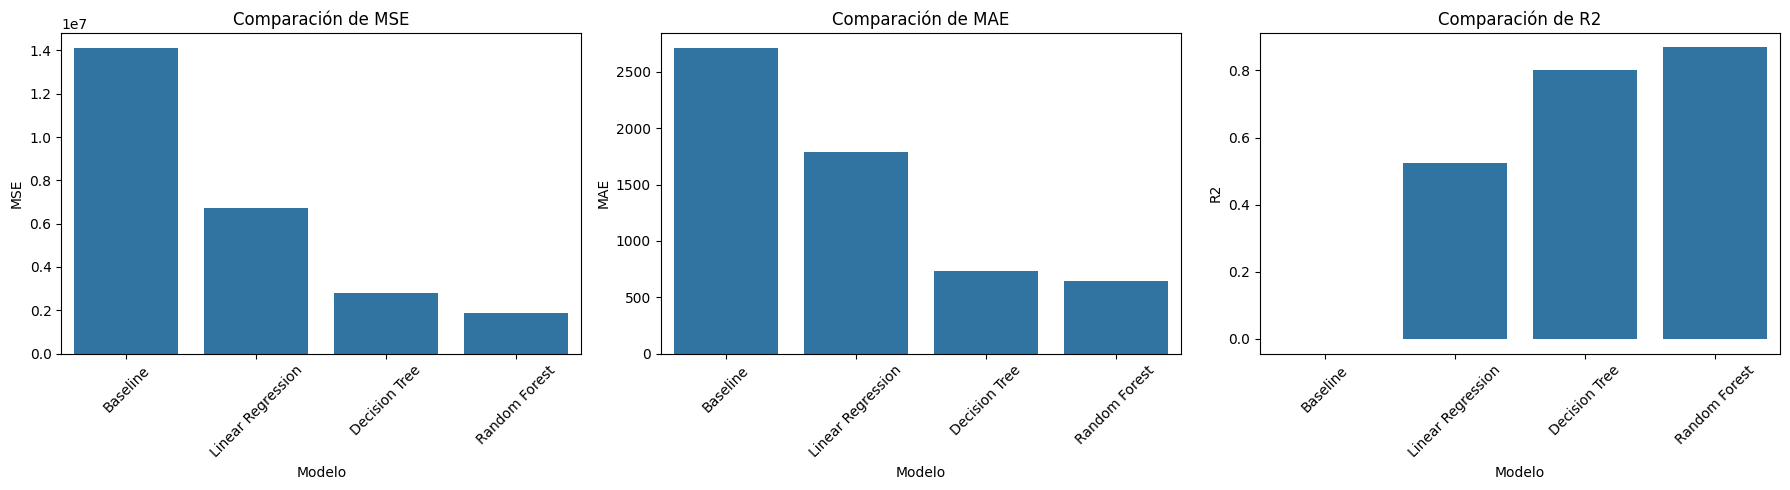

Conclusiones:
- El baseline (predicción del valor medio) sirve como punto de referencia para evaluar la mejora obtenida con los modelos.
- Los modelos que muestran un MSE y MAE significativamente menores que el baseline, y un R2 mayor, están capturando mejor la variabilidad del precio.
- Según las métricas obtenidas, se puede identificar cuál modelo resulta ser el más adecuado comparado con el baseline.


In [ ]:


# Evaluar los modelos optimizados y comparar con un baseline simple de predicción

# Baseline: predecir el valor medio de y_train para todas las instancias
baseline_value = y_train.mean()
y_pred_baseline = np.full_like(y_test, fill_value=baseline_value, dtype=float)

# Diccionario para guardar las métricas de cada modelo y del baseline
metricas = {}

# Definir la función para calcular métricas
def calcular_metricas(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

# Calcular métricas para el baseline
metricas["Baseline"] = calcular_metricas(y_test, y_pred_baseline)

# Calcular métricas para cada modelo entrenado
for nombre, modelo in best_models.items():
    y_pred_modelo = modelo.predict(X_test)
    metricas[nombre] = calcular_metricas(y_test, y_pred_modelo)

# Convertir el diccionario en un DataFrame para mejor visualización
metricas_df = pd.DataFrame(metricas).T
print(metricas_df)

# Graficar las métricas de comparación
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metric_names = ["MSE", "MAE", "R2"]

for ax, m in zip(axes, metric_names):
    sns.barplot(x=metricas_df.index, y=metricas_df[m], ax=ax)
    ax.set_title(f'Comparación de {m}')
    ax.set_ylabel(m)
    ax.set_xlabel('Modelo')
    # Rotar etiquetas en el eje x si es necesario
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Conclusión
print("Conclusiones:")
print("- El baseline (predicción del valor medio) sirve como punto de referencia para evaluar la mejora obtenida con los modelos.")
print("- Los modelos que muestran un MSE y MAE significativamente menores que el baseline, y un R2 mayor, están capturando mejor la variabilidad del precio.")
print("- Según las métricas obtenidas, se puede identificar cuál modelo resulta ser el más adecuado comparado con el baseline.")

In [20]:
# Conclusiones finales y próximos pasos

print("Conclusión final:")
print("Los resultados obtenidos muestran que, en comparación con un baseline simple y un modelo de regresión lineal, los modelos basados en árboles, especialmente el Random Forest, han demostrado una capacidad superior para predecir de forma precisa el precio. Esto indica que las variables seleccionadas y el proceso de preprocesamiento realizado han permitido capturar relaciones relevantes entre las características y el precio.")

print("\nPróximos pasos:")
print("- Validar la robustez del modelo con nuevos datos o mediante validación cruzada extendida.")
print("- Investigar la importancia de variables para explorar posibles mejoras en la selección o extracción de features.")
print("- Probar modelos adicionales (por ejemplo, métodos de boosting) que puedan aportar mejoras.")
print("- Optimizar nuevamente los hiperparámetros del modelo seleccionado y evaluar su desempeño a lo largo del tiempo.")
print("- Planificar la integración del modelo en un entorno de producción y establecer mecanismos de monitoreo continuo.")

Conclusión final:
Los resultados obtenidos muestran que, en comparación con un baseline simple y un modelo de regresión lineal, los modelos basados en árboles, especialmente el Random Forest, han demostrado una capacidad superior para predecir de forma precisa el precio. Esto indica que las variables seleccionadas y el proceso de preprocesamiento realizado han permitido capturar relaciones relevantes entre las características y el precio.

Próximos pasos:
- Validar la robustez del modelo con nuevos datos o mediante validación cruzada extendida.
- Investigar la importancia de variables para explorar posibles mejoras en la selección o extracción de features.
- Probar modelos adicionales (por ejemplo, métodos de boosting) que puedan aportar mejoras.
- Optimizar nuevamente los hiperparámetros del modelo seleccionado y evaluar su desempeño a lo largo del tiempo.
- Planificar la integración del modelo en un entorno de producción y establecer mecanismos de monitoreo continuo.
